### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

# Compile the main simulator code using cython 

In [3]:
!python setup.py build_ext --inplace 

running build_ext
running build_ext


# Import all the relevant files 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
#Importing scripts:

#Import relevant frames:
import cbgt as cbgt
import pipeline_creation as pl_creat

#Import plotting functions:
import plotting_functions as plt_func
import plotting_helper_functions as plt_help

data_dir = "./Data/"
figure_dir = "./Figures/"

2023-04-18 17:07:42,862	INFO worker.py:842 -- Connecting to existing Ray cluster at address: 192.168.1.152:6379


# Choose the experiment and create the main pipeline

In [6]:
#Choose the experiment
experimentchoice = 'stopsignal'

#Call choose_pipeline with the pipeline object
pl_creat.choose_pipeline(experimentchoice)

#Create the main pipeline
pl = pl_creat.create_main_pipeline(runloop=True)

in choose pipeline
in reward pipeline


In [7]:
#Set a seed
seed = np.random.randint(0,99999999,1)[0]
print(seed)

75434668


# Running the pipeline

In [8]:
environment = {
    'experimentchoice': experimentchoice,
    'inter_trial_interval':1000.,
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df_set': pd.DataFrame([[0.5, 0.5]],columns=["left","right"]), #pd.DataFrame([[0.3,0.7]],columns=['left','right']), #initialized Q-values df (qvalues.py)  
    'n_trials': 3, #number of trials (generateepochs.py)
    'volatility': [1,"exact"], #frequency of changepoints (generateepochs.py)
    'conflict': (1.0, 0.0), #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 0.95, # amplitude of the cortical input over base line #0.85
    'sustainedfraction': 0.75,
    
    #Stop - STN
    'stop_signal_present': False,
    'stop_signal_probability': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude': 0.45, # amplitude of the stop signal over base line
    'stop_signal_onset': 55., #in ms #antes 200
    'stop_signal_duration' : 160., 
    'stop_signal_channel': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signa
    
    #Stop- D2STR
    'stop_signal_present_2': False,
    'stop_signal_probability_2': 1., #probability of trials that will get the stop signal / list of trial numbers
    'stop_signal_amplitude_2': 1., # amplitude of the stop signal over base line
    'stop_signal_onset_2': 55., #in ms #antes 200
    'stop_signal_duration_2' : 160.,
    'stop_signal_channel_2': "all", #"all" (all channels are given the stop signal) 
                                #/"any" (channel given the stop signal is chosen randomly)
                                # [list of channels] == subset of channels given the stop signal
    
    'decision_channel' : '1', #'all'(all channels)
                              # '0' : left channel considered 
                              # '1' : right channel considered
    
    'record_variables':["weight","optogenetic_input"],
    
    #Opto
    'opt_signal_present': False,
    'opt_signal_probability': 1., #[0,1,2,3,4], # probability of trials that will get the optogenetic signal / list of trial numbers
    'opt_signal_amplitude': 2.4, # ampitude of the stop signal over base line
    'opt_signal_onset': 20., # in ms
    'opt_signal_duration': 100.,
    'opt_signal_channel': "all", # "all" (all channels are given the stop signal) 
    'opt_signal_population':["GPeA"],
}

In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl]*1,[environment]*1)  

SpawnThreadManagers <backend.Pipeline object at 0x7f56f682d370>
SpawnThreadManagers <backend.Pipeline object at 0x7f56f682d3a0>
(worker pid=2606634) in choose pipeline
(worker pid=2606634) conflict (1.0, 0.0)
(worker pid=2606634) change points: [0 1 2 2]
(worker pid=2606634) conflict (1.0, 0.0)
SpawnThreadManagers <backend.Pipeline object at 0x7f56f682dd60>
(worker pid=2606634) <class 'float'>
(worker pid=2606634) [2 0 1]
(worker pid=2606634) in choose pipeline
(worker pid=2606634) conflict (1.0, 0.0)
(worker pid=2606634) change points: [0 1 2 2]
(worker pid=2606634) conflict (1.0, 0.0)
(worker pid=2606634) <class 'float'>
(worker pid=2606634) [2 0 1]
(worker pid=2606634) <class 'float'>
(worker pid=2606634) [2 1 0]
(worker pid=2606634) <class 'float'>
(worker pid=2606634) [2 1 0]
SpawnThreadManagers <backend.Pipeline object at 0x7f56f67a7d00>
(worker pid=2606634) begin GenOptSchedule
(worker pid=2606634) <class 'float'>
(worker pid=2606634) [1 0 2]
(worker pid=2606634) pop GPeA
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:113: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:126: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df

(worker pid=2606634) agent.opt_popids [6 7]
(worker pid=2606634) agent.opt_popids [6 7]
(worker pid=2606634) gateFRs [24.66666667 30.22222222]
(worker pid=2606634) thresholds_crossed [1]
(worker pid=2606634) gateFRs [24.66666667 30.22222222]
(worker pid=2606634) thresholds_crossed [1]


(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634)   action
(worker pid=2606634) 0   left
(worker pid=2606634) 1  right
(worker pid=2606634) chosen_action: right
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634)   action
(worker pid=2606634) 0   left
(worker pid=2606634) 1  right
(worker pid=2606634) chosen_action: right
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc 
(worker pid=2606634) [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 0
(worker pid=2606634) q_val_chosen [0.5]
(worker pid=2606634) da_inc [-0.5]
(worker pid=2606634) Q_df updated
(worke

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) tria

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc 
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df upda

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen 
(worker pid=2606634) trial_num 1

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) tria

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen 
(worker pid=2606634) [0.375]
(wo

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen 
(worker pid=2606634) [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(wo

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) tria

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_inc [0.66501572]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 1
(worker pid=2606634) q_val_chosen [0.375]
(worker pid=2606634) da_i

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen 
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df upda

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634)   action
(worker pid=2606634) 0   left
(worker pid=2606634) 1  right
(worker pid=2606634) chosen_action: right
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634)  

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen 
(worker pid=2606634) [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker p

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc 
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen 
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df upda

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc 
(worker pid=2606634) [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker p

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) 
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker p

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) trial_num 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chos

(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
(worker pid=2606634)   Q_df = Q_df.append(new_data)
(worker pid=2606634) /home/jyotika/Work/CBGTPy_release/CBGTPy/qvalues.py:182: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=2606634) Q_df updated
(worker pid=2606634) trial_num 2
(worker pid=2606634) q_val_chosen [0.54125393]
(worker pid=2606634) da_inc [-0.54125393]
(worker pid=260663

In [10]:
#List all the agent variables accessible
results[0].keys()

dict_keys(['experimentchoice', 'inter_trial_interval', 'params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df_set', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'sustainedfraction', 'stop_signal_present', 'stop_signal_probability', 'stop_signal_amplitude', 'stop_signal_onset', 'stop_signal_duration', 'stop_signal_channel', 'stop_signal_present_2', 'stop_signal_probability_2', 'stop_signal_amplitude_2', 'stop_signal_onset_2', 'stop_signal_duration_2', 'stop_signal_channel_2', 'decision_channel', 'record_variables', 'opt_signal_present', 'opt_signal_probability', 'opt_signal_amplitude', 'opt_signal_onset', 'opt_signal_duration', 'opt_signal_channel', 'opt_signal_population', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'block', 'stop_df', 'stop_channels_df', 'stop_amplitude_df', 'stop_onset_df', 'stop_duration_df', 'stop_df_2', 'stop_channels_df_2', 'stop_

In [11]:
firing_rates, rt_dist = plt_help.extract_relevant_frames_stop(results,seed)

/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_helper_functions.py:219: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rt_distribution = rt_distribution.append(rt)


In [12]:
datatables = cbgt.collateVariable(results,'datatables')
datatables[0]

decision stimulusstarttime decisiontime decisionduration  \
0    right                 0          113              113   
1    right              1415         1552              137   
2    right              2854         3010              156   

  decisiondurationplusdelay rewardtime correctdecision  reward  
0                       414        414            left     0.0  
1                       438       1853           right     1.0  
2                       457       3311            left     0.0

In [13]:
len(datatables)

1

In [14]:
datatables[0].iloc[0]

decision                     right
stimulusstarttime                0
decisiontime                   113
decisionduration               113
decisiondurationplusdelay      414
rewardtime                     414
correctdecision               left
reward                         0.0
Name: 0, dtype: object

In [15]:
popfreqs = cbgt.collateVariable(results,'popfreqs')
plt_help.rename_columns(results[0])
popfreqs[0]

GPi_left  GPi_right  STNE_left  STNE_right  GPeP_left  GPeP_right  \
0     80.666667  78.222222  22.288889   23.355556  48.666667   47.600000   
1     80.666667  78.000000  22.377778   23.444444  49.100000   47.433333   
2     81.333333  78.666667  22.422222   23.577778  48.900000   47.466667   
3     81.333333  78.222222  22.400000   23.400000  48.566667   47.600000   
4     82.222222  78.888889  22.377778   23.222222  48.366667   47.900000   
...         ...        ...        ...         ...        ...         ...   
4308  66.000000  74.222222  24.066667   23.666667  45.200000   48.766667   
4309  66.000000  73.555556  24.177778   23.577778  45.133333   48.700000   
4310  65.555556  74.222222  23.866667   23.622222  45.166667   48.800000   
4311  65.555556  74.000000  24.022222   23.644444  45.100000   48.433333   
4312  66.000000  74.666667  23.800000   23.622222  45.166667   47.933333   

      GPeA_left  GPeA_right  D1STR_left  D1STR_right  D2STR_left  D2STR_right  \
0     12.733333   12.200000    1.333333     2.000000    1.555556     1.555556   
1     12.800000   12.066667    1.333333     2.000000    1.555556     1.555556   
2     12.933333   11.933333    1.555556     2.000000    1.555556     1.555556   
3     13.000000   11.800000    1.777778     2.000000    1.555556     1.555556   
4     13.000000   11.933333    1.777778     2.000000    1.555556     1.555556   
...         ...         ...         ...          ...         ...          ...   
4308  14.066667   12.333333    4.666667     2.444444    4.222222     3.111111   
4309  14.000000   12.266667    4.666667     2.444444    4.444444     3.111111   
4310  13.800000   12.466667    4.666667     2.222222    4.222222     3.111111   
4311  13.933333   12.466667    4.888889     2.222222    4.444444     3.111111   
4312  13.800000   12.600000    4.888889     2.222222    4.444444     3.333333   

       Cx_left  Cx_right    Th_left   Th_right  FSI_common  CxI_common  \
0     0.000000  0.000000   6.000000   6.444444    8.000000    0.896057   
1     0.000000  0.000000   6.000000   6.444444    8.000000    0.896057   
2     0.000000  0.000000   6.000000   6.444444    8.000000    0.896057   
3     0.000000  0.000000   6.222222   6.444444    7.777778    0.716846   
4     0.000000  0.000000   6.444444   6.444444    8.000000    0.716846   
...        ...       ...        ...        ...         ...         ...   
4308  4.003268  3.839869  15.555556  12.222222   10.222222    2.688172   
4309  4.084967  3.839869  15.555556  12.222222   10.444444    2.598566   
4310  4.248366  4.084967  15.777778  12.000000   10.222222    2.598566   
4311  4.248366  4.084967  15.333333  12.444444   10.222222    2.598566   
4312  4.493464  4.411765  15.555556  12.666667   10.444444    2.777778   

      Time (ms)  
0             0  
1             1  
2             2  
3             3  
4             4  
...         ...  
4308       4308  
4309       4309  
4310       4310  
4311       4311  
4312       4312  

[4313 rows x 19 columns]

In [16]:
len(firing_rates)

1

AttributeError: 'list' object has no attribute 'stimulusstarttime'

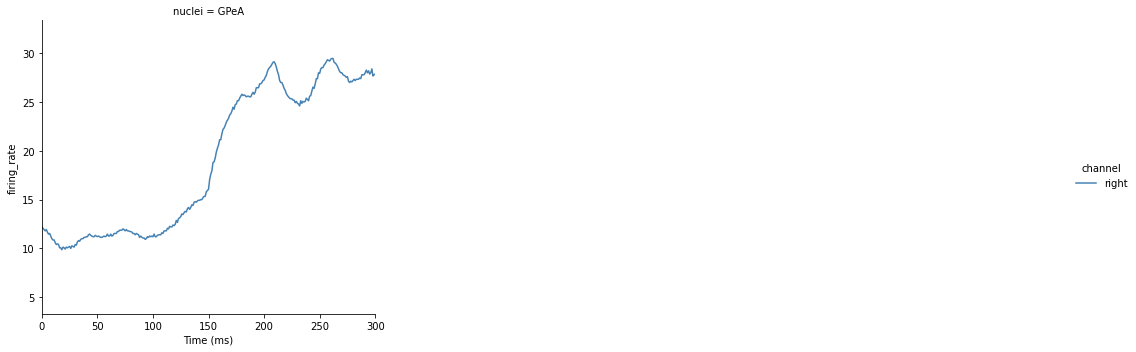

In [17]:
FR_fig_handles = plt_func.plot_fr_flex(firing_rates[0],datatables, ['right'], ['GPeA'], (0, 300)) 

In [18]:
import importlib

importlib.reload(plt_func)

<module 'plotting_functions' from '/home/jyotika/Work/CBGTPy_release/CBGTPy/plotting_functions.py'>

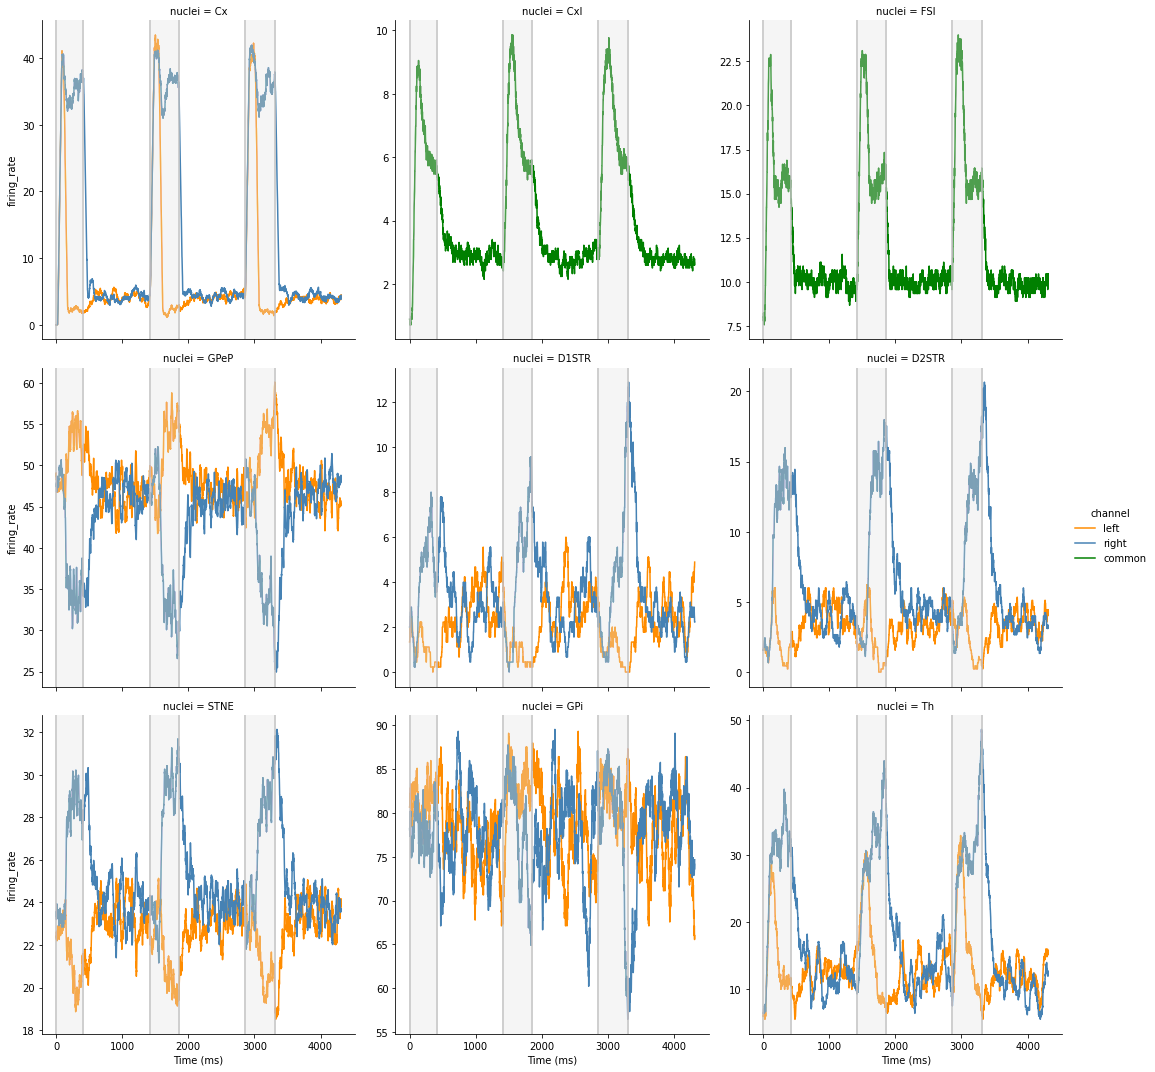

In [19]:
FR_fig_handles = plt_func.plot_fr(firing_rates, datatables)

In [ ]:
results[0]['datatables'].iloc[1].stimulusstarttime

In [ ]:
from matplotlib.lines import Line2D

f, (ax1, ax2, ax3) = plt.subplots(3, 2, figsize=(14, 10), sharex=True)
plt_help.rename_columns(results[0])

for i in range(0,len(datatables[0])):
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D2STR_right', c ='b', ax=ax1[0])
    #ax1[0].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[0].legend(['D2STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    if results[0]['stop_signal_present_2'] == True:
        ax1[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax1[0].set_xlabel('Time (ms)')
    ax1[0].title.set_text('D2STR')
    
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax1[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='D1STR_right', c ='b', ax=ax1[1])
    #ax1[1].vlines(datatables[0].stimulusstarttime[i],0,150,'silver', alpha = 0.7)
    if datatables[0].decision[i] == 'right':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax1[1].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle='dotted')
    else: 
        ax1[0].vlines(datatables[0].decisiontime[i],0,150,'m')
    #ax1[1].legend(['D1STR'], loc = 'best') #(['D2STR_left', 'D2STR_right'], loc = 'best')
    ax1[1].set_xlabel('Time (ms)')
    ax1[1].title.set_text('D1STR')
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_right', c ='b', ax=ax2[0])
    #ax2[0].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'r', linestyle='dotted')
    else: 
        ax2[0].vlines(datatables[0].decisiontime[i],0,130,'m')
    #ax2[0].legend(['GPeP'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax2[0].hlines(y=72, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
        #ax2[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax2[0].set_xlabel('Time (ms)')
    ax2[0].title.set_text('GPeP')
    #if results[0]['opt_signal_present'] == True:
        #ax2[0].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='darkmagenta', linewidth = 6)
       

    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='GPeP_left', c ='y', ax=ax2[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax2[1].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPeA_right', c ='b', ax=ax2[1])
    #ax2[1].vlines(datatables[0].stimulusstarttime[i],0, 130,'silver', alpha=0.7) 
    if datatables[0].decision[i] == 'right':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'y')
    elif datatables[0].decision[i] == 'stop': 
        ax2[1].vlines(datatables[0].decisiontime[i],0,130,'r', linestyle='dotted')
    else: 
        ax1[1].vlines(datatables[0].decisiontime[i],0,130,'m')
    #ax2[1].legend(['GPeA'], loc = 'best') #(['GPeP_left', 'GPeP_right'], loc = 'best')
    #if results[0]['stop_signal_present'] == True:
        #ax1[1].hlines(y=36, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    #if results[0]['stop_signal_present_2'] == True:
       #ax1[1].hlines(y=35, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df_2'].iloc[0][0]+results[0]['stop_signal_duration_2'], colors='y', linewidth = 6)
    ax2[1].set_xlabel('Time (ms)')
    ax2[1].title.set_text('GPeA')
    if results[0]['opt_signal_present'] == True:
        ax2[1].hlines(y=90, xmin=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['opt_onset_df'].iloc[0][0]+results[0]['opt_signal_duration'], colors='mediumseagreen', linewidth = 6)
       
    
    #results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_left', c ='y', ax=ax3[0])
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[0].vlines(j, 3, 117, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='STNE_right', c ='b', ax=ax3[0])
    #ax3[0].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[0].vlines(datatables[0].decisiontime[i], 0, 150, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'r', linestyle='dotted')
    else: 
        ax3[0].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    #ax3[0].legend(['STNE'], loc = 'best') #(['STNE_left', 'STNE_right'], loc = 'best')
    if results[0]['stop_signal_present'] == True:
        ax3[0].hlines(y=80, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
    ax3[0].set_xlabel('Time (ms)')
    ax3[0].title.set_text('STNE')
    
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax3[1].vlines(j, 3, 137, 'whitesmoke', alpha=0.04)
    results[0]['popfreqs'].plot(x='Time (ms)', y='GPi_right', c ='b', ax=ax3[1], label='GPi')
    #ax3[1].vlines(datatables[0].stimulusstarttime[i], 0,150,'silver', alpha=0.7)
    if datatables[0].decision[i] == 'right':
        ax3[1].vlines(datatables[0].decisiontime[i], 0, 150, 'b', linestyle='dotted')
    elif datatables[0].decision[i] == 'left':
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'y')
    elif datatables[0].decision[i] == 'stop': 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'r', linestyle='dotted')
    else: 
        ax3[1].vlines(datatables[0].decisiontime[i],0, 150, 'm')
    ax3[1].set_xlabel('Time (ms)')
    ax3[1].title.set_text('GPi')
    
ax1[1].set_ylim(0, 120)
ax2[0].set_ylim(0, 120)
ax2[1].set_ylim(0, 120)
ax1[0].set_ylim(0, 120)
ax3[0].set_ylim(0, 120)
ax3[1].set_ylim(0, 120)

ax1[0].get_legend().remove()
ax1[1].get_legend().remove()
ax2[0].get_legend().remove()
ax2[1].get_legend().remove()
ax3[0].get_legend().remove()
ax3[1].get_legend().remove()

#blue_patch = mpatches.Patch(color='blue', linestyle='dotted', linewidth=0.5, label='go')
#red_patch = mpatches.Patch(color='red', label='stop')
#fig.legend(handles=[blue_patch, red_patch])

legend_elements = [Line2D([0], [0], color='blue', lw=3, linestyle='dotted', label='go'),
                   Line2D([0], [0], color='red', lw=3, linestyle='dotted', label='stop')]
ax1[1].legend(handles=legend_elements, bbox_to_anchor =(1.04, 1.), loc='upper left')

In [ ]:
import pylab as pl
from matplotlib.lines import Line2D

plt_help.rename_columns(results[0])
popfreqs = cbgt.collateVariable(results,'popfreqs')
datatables = cbgt.collateVariable(results,'datatables')

opt_input = np.array(results[0]['agent'].opt_inp)

f, (ax) = pl.subplots(1, 2, figsize=(16, 6), sharex=True)

for i in range(0,len(datatables[0])):
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax[0].vlines(j, 0, 117, 'whitesmoke', alpha=0.03)
    if datatables[0].decision[i] == 'right':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle=':')
    elif datatables[0].decision[i] == 'left':
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'orange', linestyle=':')
    elif datatables[0].decision[i] == 'stop': 
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle=':')
    else: 
        ax[0].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle=':') 
ax[0].plot(opt_input[:,0],label='GPeA-baseline', color = 'tab:green', linewidth = 2.5)
ax[0].legend()
ax[0].set_xlabel('Time (ms)')
ax[0].title.set_text('Input stimulus over baseline')


    #ax[1].plot(results[0]['popfreqs']['STNE_left'],label="STN-left-activity",color='y')

for i in range(0,len(datatables[0])):
    for j in np.arange(datatables[0].stimulusstarttime[i], datatables[0].rewardtime[i]):
        ax[1].vlines(j, 0, 117, 'whitesmoke', alpha=0.03)
    if datatables[0].decision[i] == 'right':
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'b', linestyle=':')
    elif datatables[0].decision[i] == 'left':
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'orange',linestyle=':')
    elif datatables[0].decision[i] == 'stop': 
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'r', linestyle=':')
    else: 
        ax[1].vlines(datatables[0].decisiontime[i],0,150,'m', linestyle=':')  
    #ax[0].hlines(y=5.5, xmin=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[action_idx][0], xmax=datatables[0].stimulusstarttime[i]+results[0]['stop_onset_df'].iloc[0][0]+results[0]['stop_signal_duration'], colors='r', linewidth = 6)
ax[1].plot(results[0]['popfreqs']['GPeA_right'],label="D1STR-activity",color='b')
ax[1].legend()
ax[1].set_xlabel('Time (ms)')
ax[1].title.set_text('GPeA activity over 3 trials')
    
ax[0].get_legend().remove()
ax[1].get_legend().remove()

ax[1].set_ylim(0, 40)
ax[0].set_ylim(0, 40)

legend_elements = [Line2D([0], [0], color='blue', lw=3, linestyle='dotted', label='go right'),
                   Line2D([0], [0], color='orange', lw=3, linestyle='dotted', label='go left')]
ax[1].legend(handles=legend_elements, bbox_to_anchor =(1.04, 1.), loc='upper left')


pl.show()